In [137]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import glob


In [138]:
df = pd.read_csv('oversampling_combined_data_labeled.csv')

In [139]:
df = df.sample(frac=1).reset_index(drop=True)

In [140]:
Y = pd.get_dummies(df['label'])
X = df.drop(['label'],axis=1)

In [141]:
X.columns

Index(['temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction',
       'rain', 'cloudiness', 'description', 'condition_type'],
      dtype='object')

In [142]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] >=0.9 and logs['accuracy'] >= 0.9:
            self.model.stop_training = True

In [143]:
import random

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

In [144]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [145]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

In [146]:
history = model.fit(X, Y, epochs=100, batch_size=16 , validation_split=0.3, verbose=1, callbacks=[CustomCallback(),tf.keras.callbacks.TensorBoard(log_dir="./logs")])

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3047 - loss: 9.6384 - val_accuracy: 0.3492 - val_loss: 1.5927
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3318 - loss: 1.5055 - val_accuracy: 0.3719 - val_loss: 1.0988
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3610 - loss: 1.2428 - val_accuracy: 0.5041 - val_loss: 1.0822
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4614 - loss: 1.0554 - val_accuracy: 0.5351 - val_loss: 0.9909
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4993 - loss: 0.9781 - val_accuracy: 0.5248 - val_loss: 0.9703
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5395 - loss: 0.9221 - val_accuracy: 0.5992 - val_loss: 0.9624
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5175 - loss: 0.9334 - val_accuracy: 0.6033 - val_loss: 0.8351
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6157 - loss: 0.8023 - val_accuracy: 0.6715 - v

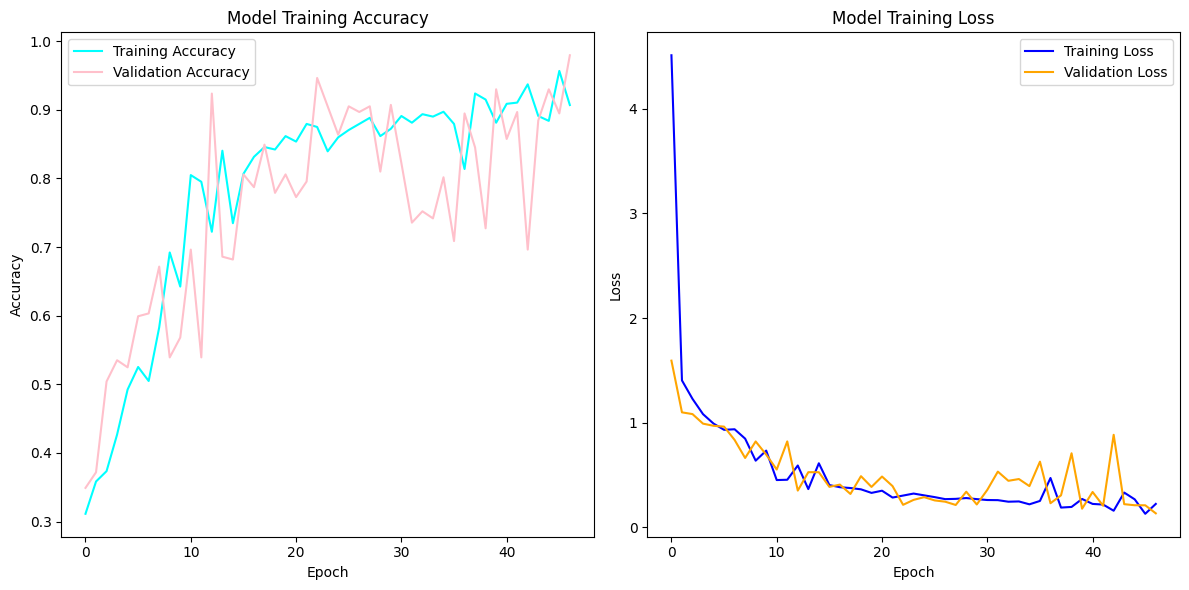

In [147]:
plt.figure(figsize=(12, 6))

# Subplot ketiga untuk training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='cyan')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='pink')
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot keempat untuk training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [148]:
existing_files = glob.glob('./prediksi_banjir_*.keras')

if existing_files:
    os.remove(existing_files[0])

now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

model.save(f"prediksi_banjir_{now}.keras")

In [149]:
label = ['aman','bahaya','waspada']

In [150]:
new_model = tf.keras.models.load_model(f"prediksi_banjir_{now}.keras")
aman = np.round(new_model.predict(np.array([23.46,98,1009,0.43,162,0.0,100,3,0]).reshape(1,-1)),decimals=4) #aman
waspada_md = np.round(new_model.predict(np.array([23.02,99,1010,0.14,309,1.05,86,6,1]).reshape(1,-1)),decimals=4) #waspada moderate rain
waspada_li = np.round(new_model.predict(np.array([23.08,99,1010,0.31,293,0.98,88,4,1]).reshape(1,-1)),decimals=4) #waspada light rain
bahaya = np.round(new_model.predict(np.array([29.56,79,1007,0.83,250,1.35,83,6,1]).reshape(1,-1)),decimals=4) #bahaya

print(aman, label[np.argmax(aman)])
print(waspada_md, label[np.argmax(waspada_md)])
print(waspada_li, label[np.argmax(waspada_li)])
print(bahaya, label[np.argmax(bahaya)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[9.998e-01 0.000e+00 2.000e-04]] aman
[[0.009  0.2837 0.7072]] waspada
[[2.601e-01 7.000e-04 7.393e-01]] waspada
[[0.0015 0.6188 0.3797]] bahaya


In [151]:
df['predicted'] = [label[np.argmax(x)] for x in new_model.predict(X) ]

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [152]:
df.head()

,temperature,humidity,pressure,wind_speed,wind_direction,rain,cloudiness,description,condition_type,label,predicted
0,23.38,97,1008,1.02,203,0.00,45,1,0,aman,aman
1,25.37,88,1008,1.22,163,0.00,99,3,0,aman,aman
2,24.27,92,1010,0.50,120,0.16,60,4,1,aman,aman
3,26.15,94,1006,0.81,333,1.23,91,6,1,bahaya,bahaya
4,24.04,97,1010,1.20,188,0.00,100,3,0,aman,aman


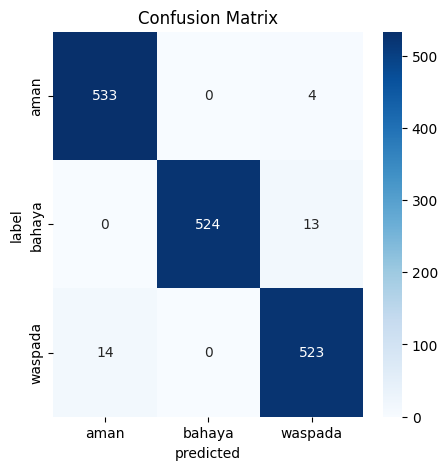

Jumlah prediksi yang tidak tepat: 31


In [153]:
plt.figure(figsize=(5, 5))
sns.heatmap(pd.crosstab(df["label"], df["predicted"]), annot=True, cmap="Blues",fmt='d')
plt.title('Confusion Matrix')
plt.show()

incorrect_predictions = (df["label"] != df["predicted"]).sum()
print("Jumlah prediksi yang tidak tepat:", incorrect_predictions)